In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
fakes = pd.read_csv("Fake.csv")
trues = pd.read_csv("True.csv")

In [3]:
fakes['label'] = 0
trues['label'] = 1

In [4]:
df = pd.concat((fakes,trues))
df.shape

(44898, 5)

In [5]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [7]:
df = df.drop(['title','date'],axis=1)
df

,text,subject,label
0,Donald Trump just couldn t wish all Americans ...,News,0
1,House Intelligence Committee Chairman Devin Nu...,News,0
2,"On Friday, it was revealed that former Milwauk...",News,0
3,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis used his annual Christmas Day mes...,News,0
...,...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1
21414,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = np.array(df['text'])
y = np.array(df['label'])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

Logistic Regression Model Score : 0.986

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4688
           1       0.98      0.99      0.99      4292

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<Axes: title={'center': 'LR Confusion Matrix'}>

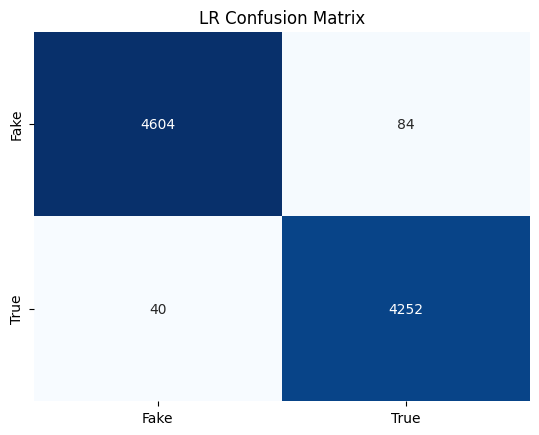

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
predictions_Lr = lr_model.predict(X_test)
print(f"Logistic Regression Model Score : {round(accuracy_score(y_test,predictions_Lr),3)}")
print(f"\nLogistic Regression Classification Report\n{classification_report(y_test,predictions_Lr)}")
cm_LR = confusion_matrix(y_test,predictions_Lr)
plt.title("LR Confusion Matrix")
sns.heatmap(cm_LR,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=["Fake","True"],yticklabels=["Fake","True"])

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
predictions_DT = dt_model.predict(X_test)
print(f"Decision Tree Model Score : {round(accuracy_score(y_test,predictions_DT),3)}")
print(f"\nDecision Tree Classification Report\n{classification_report(y_test,predictions_DT)}")

Decision Tree Model Score : 0.997

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4688
           1       1.00      1.00      1.00      4292

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
predictions_RF = rf_model.predict(X_test)
print(f"Random Forest Model Score : {round(accuracy_score(y_test,predictions_RF),3)}")
print(f"\nRandom Forest Classification Report\n{classification_report(y_test,predictions_RF)}")

Random Forest Model Score : 0.986

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4688
           1       0.99      0.98      0.99      4292

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

